# EXPLORATORY DATA ANALYSIS

# 1. DATA COLLECTION

1. Importing dataset ad required libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from plotnine import *

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('office_supplies.csv')

df.head()

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2015-110870,2015-12-12,First Class,West,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,299.94,6,0.0,NaN
1,CA-2015-110870,2015-12-12,First Class,West,OFF-SU-10001225,Office Supplies,Supplies,Staple remover,25.76,7,0.0,NaN
2,CA-2014-143210,2014-12-01,First Class,East,TEC-PH-10004434,Technology,Phones,Cisco IP Phone 7961G VoIP phone - Dark gray,271.90,2,0.0,NaN
3,CA-2014-143210,2014-12-01,First Class,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",45.84,3,0.0,NaN
4,CA-2014-143210,2014-12-01,First Class,East,FUR-FU-10002268,Furniture,Furnishings,Ultra Door Push Plate,9.82,2,0.0,NaN


1.2 Checking on basic data insights

In [3]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,8000.000000
mean,229.854588,3.789553,0.156218,28.134233
std,623.276194,2.225220,0.206456,227.328814
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.814700
50%,54.480000,3.000000,0.200000,8.765100
75%,209.940000,5.000000,0.200000,29.950500
max,22638.480000,14.000000,0.800000,8399.976000


In [4]:
df.shape

(9993, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      9993 non-null   object 
 1   Order Date    9993 non-null   object 
 2   Ship Mode     9993 non-null   object 
 3   Region        9993 non-null   object 
 4   Product ID    9993 non-null   object 
 5   Category      9993 non-null   object 
 6   Sub-Category  9993 non-null   object 
 7   Product Name  9993 non-null   object 
 8   Sales         9993 non-null   float64
 9   Quantity      9993 non-null   int64  
 10  Discount      9993 non-null   float64
 11  Profit        8000 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.0+ KB


1.3 Checking for unique values

In [6]:
df.nunique()

Order ID        5008
Order Date      1237
Ship Mode          4
Region             4
Product ID      1862
Category           3
Sub-Category      17
Product Name    1850
Sales           6061
Quantity          14
Discount          12
Profit          6291
dtype: int64

1.4 Cleaning the data and imputing values with a model

In [7]:
df.isnull().sum()

Order ID           0
Order Date         0
Ship Mode          0
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit          1993
dtype: int64

In [8]:
X = df.loc[:,['Sales', 'Quantity', 'Discount', 'Profit']].values

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman',random_state=0)
X=imp.fit_transform(X)

df_nonan = pd.DataFrame(X, columns=['Sales', 'Quantity', 'Discount', 'Profit'])


[IterativeImputer] Completing matrix with shape (9993, 4)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.01
[IterativeImputer] Change: 2118.259918348635, scaled tolerance: 22.63848 
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.01
[IterativeImputer] Change: 0.0, scaled tolerance: 22.63848 
[IterativeImputer] Early stopping criterion reached.


In [9]:
df.loc[:,['Sales', 'Quantity', 'Discount', 'Profit']] = df_nonan

In [10]:
df['Order Date'] = df['Order Date'].astype(np.datetime64)

In [11]:
print("The range of dates available are: {} - {}".format(df['Order Date'].min(),df['Order Date'].max()))

The range of dates available are: 2014-01-03 00:00:00 - 2017-12-30 00:00:00


In [12]:
df['year'] = df['Order Date'].dt.year
df['month'] = df['Order Date'].dt.month
df['week'] = df['Order Date'].dt.isocalendar().week
df['weekday'] = df['Order Date'].dt.weekday
df['quarter'] = df['Order Date'].dt.quarter


In [13]:
df.describe()

,Sales,Quantity,Discount,Profit,year,month,week,weekday,quarter
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,229.854588,3.789553,0.156218,27.314254,2015.722306,7.809367,31.979986,3.206044,2.882218
std,623.276194,2.225220,0.206456,209.346363,1.123588,3.284664,14.375066,2.122847,1.058080
min,0.444000,1.000000,0.000000,-6599.978000,2014.000000,1.000000,1.000000,0.000000,1.000000
25%,17.280000,2.000000,0.000000,1.043000,2015.000000,5.000000,20.000000,1.000000,2.000000
50%,54.480000,3.000000,0.200000,9.599200,2016.000000,9.000000,35.000000,4.000000,3.000000
75%,209.940000,5.000000,0.200000,36.301800,2017.000000,11.000000,45.000000,5.000000,4.000000
max,22638.480000,14.000000,0.800000,8399.976000,2017.000000,12.000000,53.000000,6.000000,4.000000


# 2. DATA VISUALIZATION

STEP 6: Finding correlation between data

<AxesSubplot:>

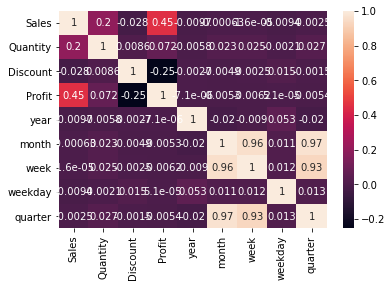

In [14]:
sns.heatmap(df.corr(), xticklabels = df.corr().columns, yticklabels = df.corr().columns, annot = True)

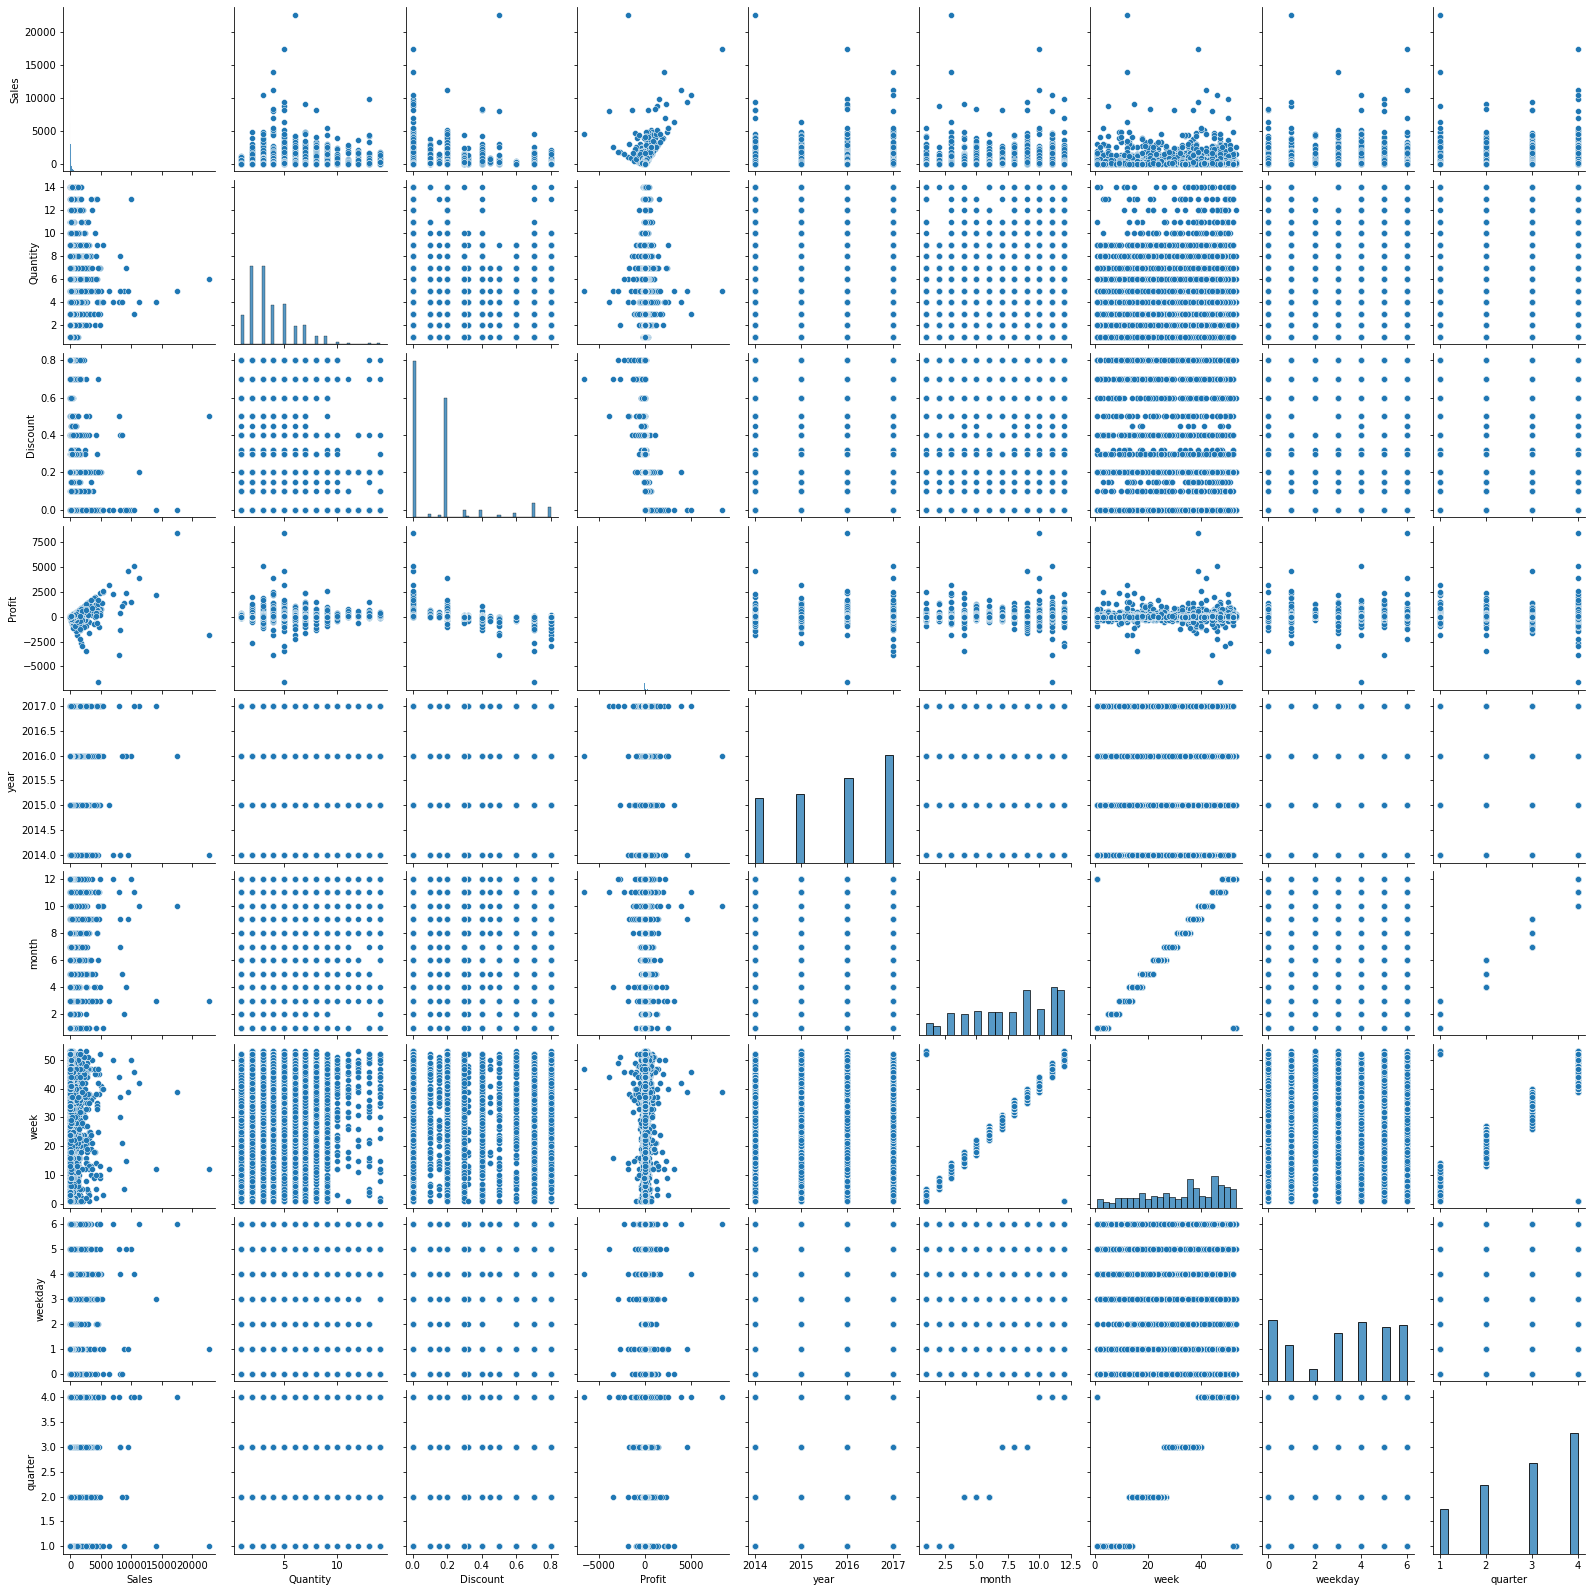

In [15]:
sns.pairplot(df)

In [16]:
import plotly.graph_objects as go
df_pie = df.groupby('Region')['Order ID'].count().reset_index(name='count')



labels = list(df_pie.Region)
values = list(df_pie['count'])

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(
    title_text="Percentage of orders per Region")
fig.show()


In [17]:
df3 = (df
.groupby(['Region'])['Sales']
.sum()
.reset_index()
.sort_values(['Sales'], ascending = [False])
)
df3

,Region,Sales
3,West,725457.8245
1,East,678781.2400
0,Central,500975.9308
2,South,391721.9050


Text(0.5, 1.0, 'Total Sales per Region')

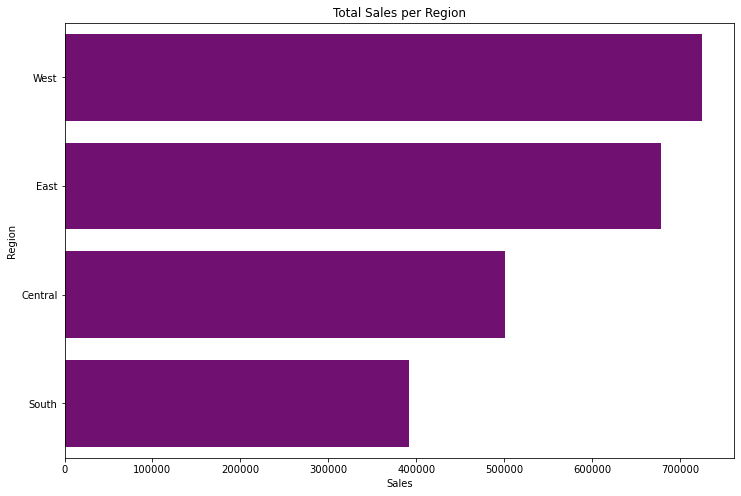

In [18]:
fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(data = df3, x = 'Sales', y = 'Region', color = 'purple')

ax.set_title('Total Sales per Region')

In [19]:
df4 = (df
.groupby(['Region'])['Sales']
.mean()
.reset_index()
.sort_values(['Sales'], ascending = [False])
)
df4

,Region,Sales
2,South,241.803645
1,East,238.336110
3,West,226.493233
0,Central,215.751908


Text(0.5, 1.0, 'Mean of Sales per Region')

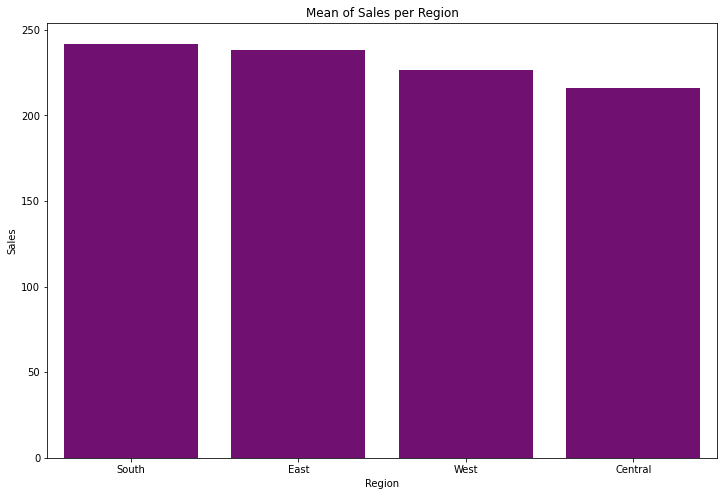

In [20]:

fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(data = df4, y = 'Sales', x = 'Region', color = 'purple')

ax.set_title('Mean of Sales per Region')

In [21]:
df5 = df.groupby(['Region','year','month'])['Sales'].sum().reset_index()
df5['x_axis'] = df5['month'].astype(str) + ' / ' + df5['year'].astype(str)
df5

,Region,year,month,Sales,x_axis
0,Central,2014,1,1539.906,1 / 2014
1,Central,2014,2,1233.174,2 / 2014
2,Central,2014,3,5827.602,3 / 2014
3,Central,2014,4,3712.340,4 / 2014
4,Central,2014,5,4048.506,5 / 2014
...,...,...,...,...,...
187,West,2017,8,25737.894,8 / 2017
188,West,2017,9,27907.037,9 / 2017
189,West,2017,10,21212.436,10 / 2017
190,West,2017,11,28941.787,11 / 2017


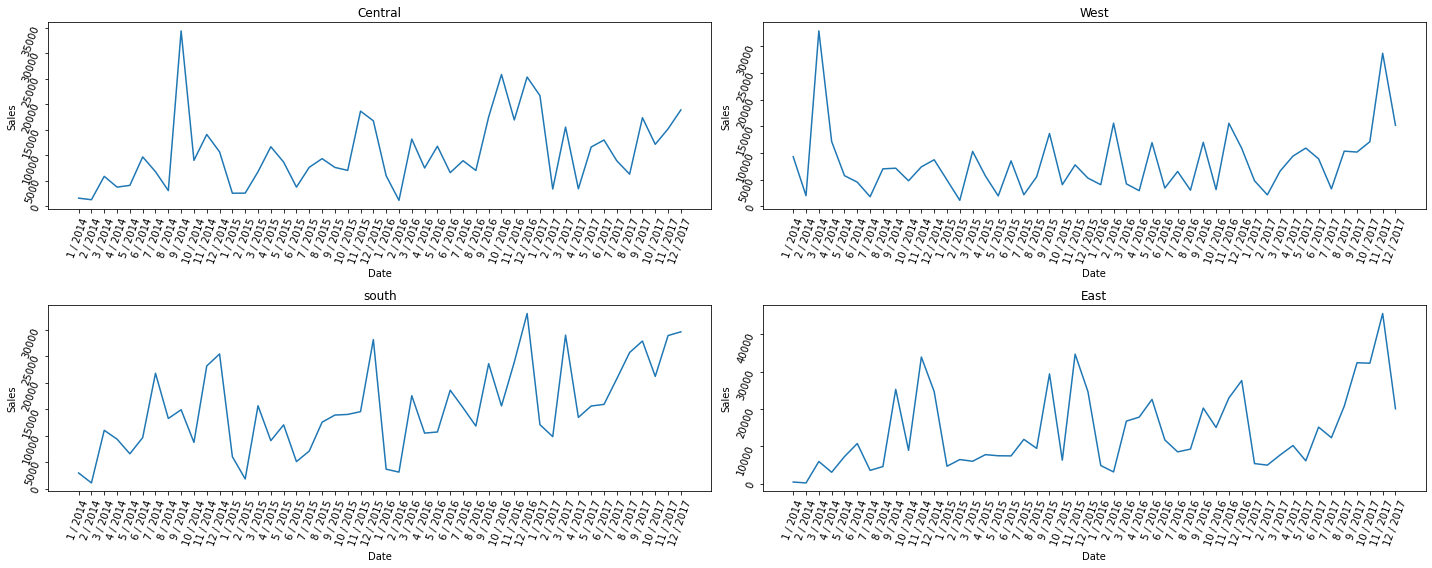

In [24]:
fig, ax = plt.subplots(2,2,figsize=(20,8))

sns.lineplot(data = df5[df5['Region']=='Central'], x = 'x_axis', y = 'Sales', ax = ax[0,0])
sns.lineplot(data = df5[df5['Region']=='South'], x = 'x_axis', y = 'Sales', ax = ax[0,1])
sns.lineplot(data = df5[df5['Region']=='West'], x = 'x_axis', y = 'Sales', ax = ax[1,0])
sns.lineplot(data = df5[df5['Region']=='East'], x = 'x_axis', y = 'Sales', ax = ax[1,1])

ax[0,0].tick_params(labelrotation=70)
ax[1,0].tick_params(labelrotation=70)
ax[0,1].tick_params(labelrotation=70)
ax[1,1].tick_params(labelrotation=70)

ax[0,0].set_title('Central')
ax[1,0].set_title('south')
ax[0,1].set_title('West')
ax[1,1].set_title('East')

ax[0,0].set(xlabel='Date')
ax[1,0].set(xlabel='Date')
ax[0,1].set(xlabel='Date')
ax[1,1].set(xlabel='Date')

fig.tight_layout()

plt.show()



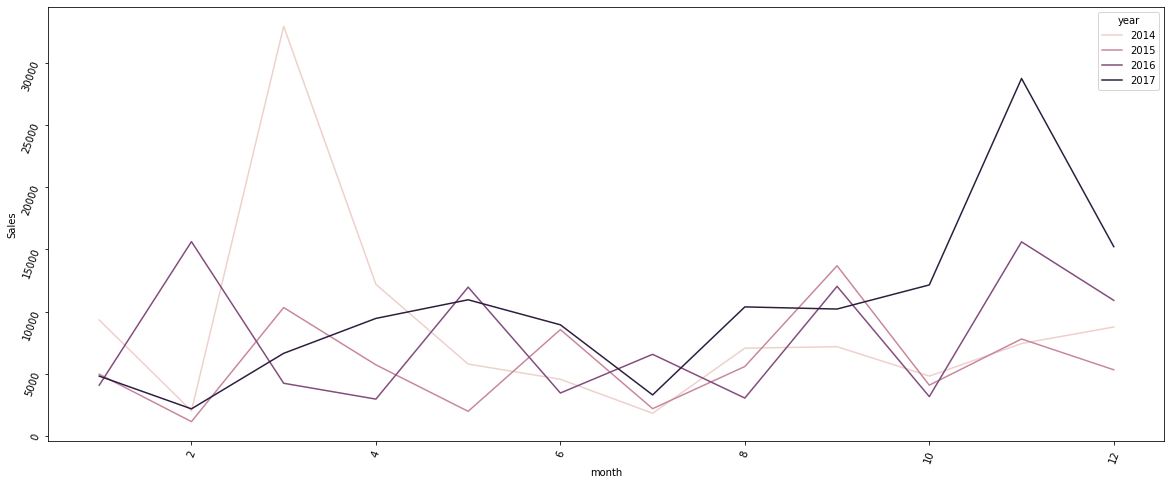

In [25]:
fig, ax = plt.subplots(figsize=(20,8))

sns.lineplot(data = df5[df5['Region']=='South'], x = 'month', y = 'Sales', hue ='year', ax = ax)

ax.tick_params(labelrotation=70)

plt.show()


In [26]:
df6 = df.groupby(['Region','quarter'])['Sales'].sum().reset_index()
df6

,Region,quarter,Sales
0,Central,1,81110.8018
1,Central,2,95084.4936
2,Central,3,134506.1562
3,Central,4,190274.4792
4,East,1,66551.7330
5,East,2,127445.5300
6,East,3,187768.8390
7,East,4,297015.1380
8,South,1,98282.5280
9,South,2,86485.5500


Text(0.5, 1.0, 'Region quarter plot')

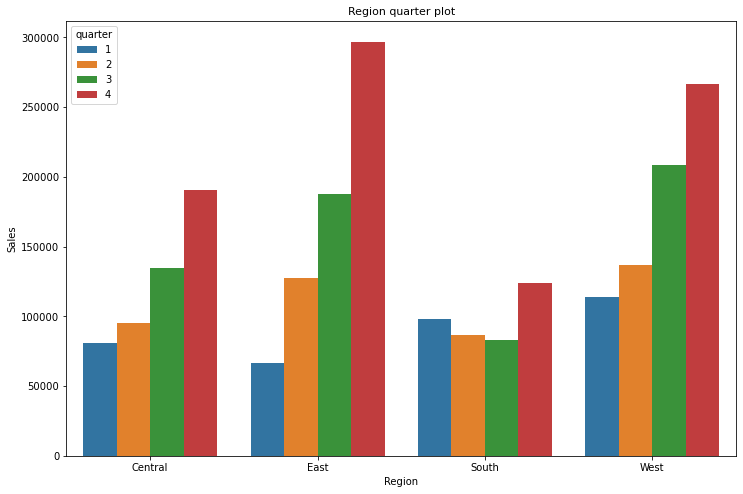

In [27]:
fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(data = df6, x = 'Region', y = 'Sales', hue = 'quarter')

ax.set_title('Region quarter plot', fontsize = 11)

In [58]:
df_grouped_sales = (df
                        .groupby(['Region','Product ID'])['Sales']
                        .sum()
                        .reset_index(name='total_sales')
                        .sort_values(['Region','total_sales'], ascending = [True,False])
                        .groupby(['Region'])
                        .head(20)
)

df_grouped_sales_count = df_grouped_sales.groupby('Product ID').size().reset_index(name = 'number_of_regions')

df_grouped_sales_count = df_grouped_sales_count.sort_values('number_of_regions', ascending = False)

df_grouped_sales

,Region,Product ID,total_sales
1166,Central,TEC-CO-10004722,17499.950
1168,Central,TEC-MA-10000822,14279.916
488,Central,OFF-BI-10001120,11339.940
469,Central,OFF-BI-10000545,10653.720
617,Central,OFF-BI-10004995,8710.336
...,...,...,...
5241,West,TEC-PH-10002885,5198.640
4860,West,OFF-ST-10000078,5144.298
4109,West,FUR-TA-10004256,5008.800
5206,West,TEC-PH-10001817,4868.800


In [29]:
df_grouped_sales_count.loc[df_grouped_sales_count['number_of_regions'] == 3]

,Product ID,number_of_regions
17,OFF-BI-10000545,3
31,TEC-CO-10001449,3
27,OFF-SU-10002881,3
34,TEC-CO-10004722,3


In [71]:
df[df['Product ID']== 'TEC-CO-10004722']['Product Name']



152     Canon imageCLASS 2200 Advanced Copier
4616    Canon imageCLASS 2200 Advanced Copier
6183    Canon imageCLASS 2200 Advanced Copier
8418    Canon imageCLASS 2200 Advanced Copier
8819    Canon imageCLASS 2200 Advanced Copier
Name: Product Name, dtype: object

In [30]:
df[df['Product ID'].isin(df_grouped_sales_count['Product ID'])]

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,year,month,week,weekday,quarter
54,CA-2015-121188,2015-08-28,Standard Class,West,FUR-BO-10004695,Furniture,Bookcases,O'Sullivan 2-Door Barrister Bookcase in Odessa...,307.666,2.0,0.15,43.362759,2015,8,35,4,3
99,CA-2016-169663,2016-03-10,First Class,West,TEC-MA-10000984,Technology,Machines,Okidata MB760 Printer,3357.600,3.0,0.20,490.548989,2016,3,10,3,1
101,CA-2015-149846,2015-05-22,Standard Class,West,TEC-MA-10004002,Technology,Machines,Zebra GX420t Direct Thermal/Thermal Transfer P...,2973.320,7.0,0.20,426.284280,2015,5,21,4,2
152,CA-2017-140151,2017-03-23,First Class,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4.0,0.00,2146.394151,2017,3,12,3,1
201,CA-2015-114811,2015-11-08,Same Day,East,TEC-PH-10004165,Technology,Phones,Mitel MiVoice 5330e IP Phone,549.980,2.0,0.00,116.676096,2015,11,45,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9807,US-2017-109316,2017-06-08,First Class,West,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",1497.666,2.0,0.15,140.956800,2017,6,23,3,2
9811,CA-2016-138478,2016-10-21,Second Class,West,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,4535.976,3.0,0.20,1644.291300,2016,10,42,4,4
9858,CA-2015-143364,2015-07-14,Second Class,West,FUR-CH-10004287,Furniture,Chairs,SAFCO Arco Folding Chair,441.920,2.0,0.20,49.716000,2015,7,29,1,3
9865,CA-2016-101672,2016-10-03,Standard Class,West,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,915.136,4.0,0.20,102.952800,2016,10,40,0,4


In [31]:
fig = px.treemap(data_frame=df, path=["Region", "Category", 'Sub-Category', 'Product Name'], values="Sales", width=900, height=600)
fig.show()

# 3. DATA ANALYSIS

In [32]:
df_6 = df.groupby('Product Name')['Profit'].sum().sort_values().head(10).reset_index()
df_7 = df.groupby('Product Name')['Profit'].sum().sort_values().tail(10).reset_index()

df_6['color'] = 'red'
df_7['color'] = 'green'



df_8 = pd.concat([df_6, df_7])

df_8['orderrr'] = list(range(1,21))

df_8

,Product Name,Profit,color,orderrr
0,Cubify CubeX 3D Printer Double Head Print,-8879.970400,red,1
1,Lexmark MX611dhe Monochrome Laser Printer,-4589.973000,red,2
2,Cubify CubeX 3D Printer Triple Head Print,-3839.990400,red,3
3,Cisco TelePresence System EX90 Videoconferenci...,-1811.078400,red,4
4,Bush Advantage Collection Racetrack Conference...,-1488.480992,red,5
5,Martin Yale Chadless Opener Electric Letter Op...,-1299.183600,red,6
6,BoxOffice By Design Rectangular and Half-Moon ...,-1148.437500,red,7
7,"Riverside Furniture Oval Coffee Table, Oval En...",-1132.053698,red,8
8,Epson TM-T88V Direct Thermal Printer - Monochr...,-1057.230000,red,9
9,3.6 Cubic Foot Counter Height Office Refrigerator,-1001.709045,red,10


Text(0.5, 0, 'Total Profit (USD)')

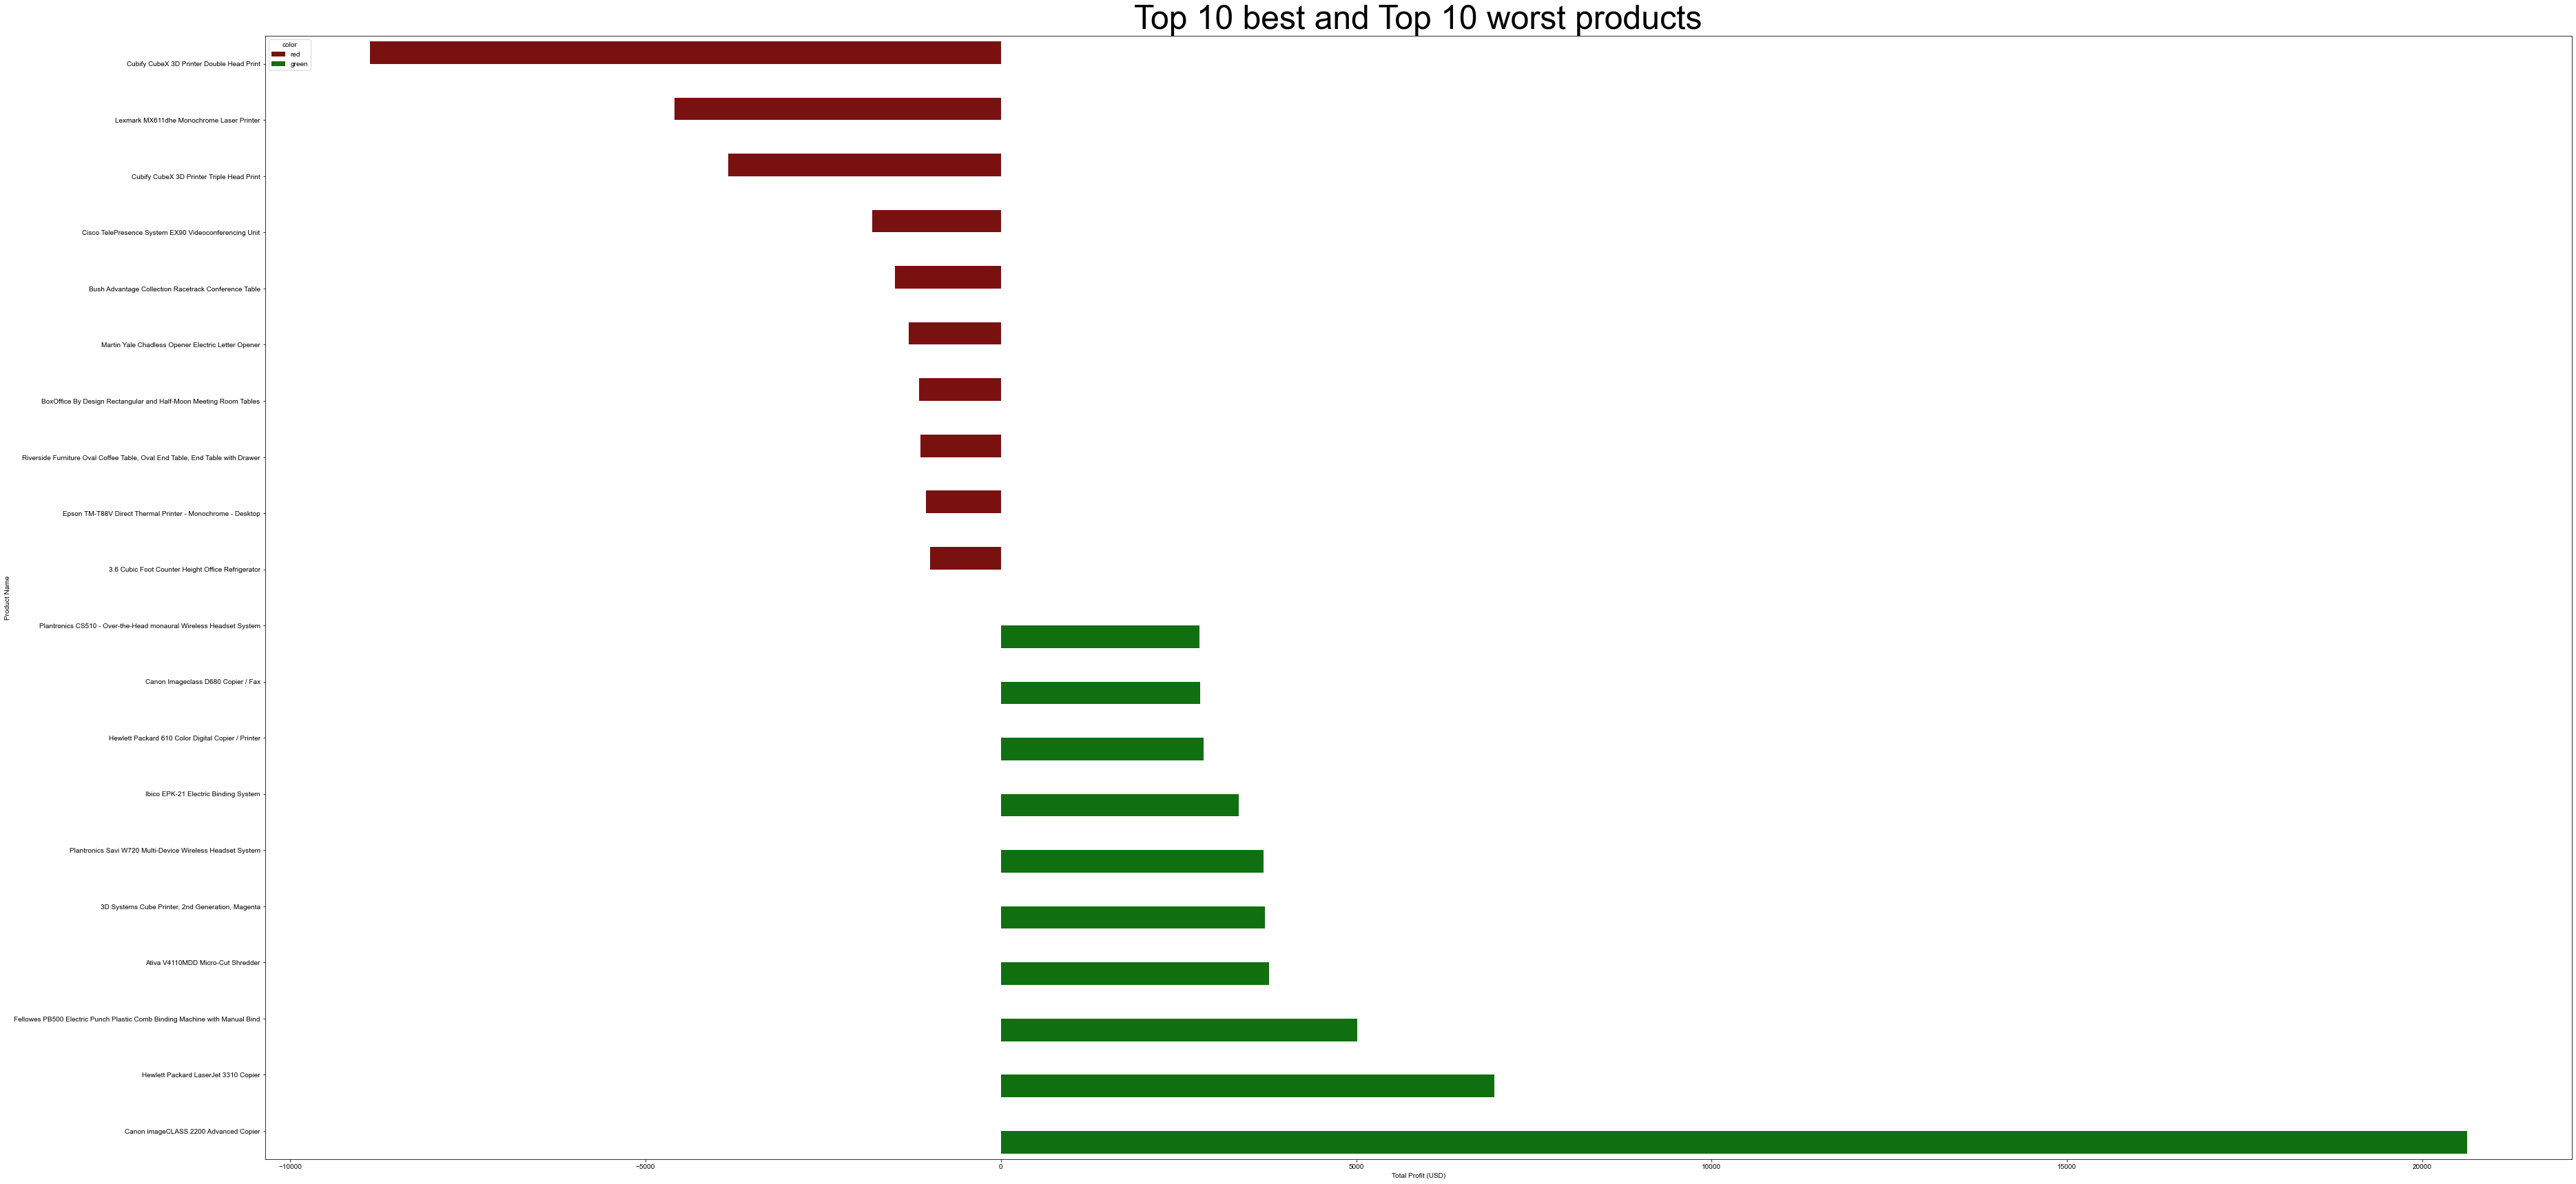

In [33]:
fig, ax = plt.subplots(figsize=(60,30))
sns.barplot(data = df_8, x='Profit', y = 'Product Name', hue = 'color', palette=["darkred", "green"])
sns.set(font_scale = 4)
sns.set_palette("dark")

ax.set_title('Top 10 best and Top 10 worst products')
ax.set_xlabel('Total Profit (USD)')

In [34]:
df_9 = df[df['Product Name'].isin(df_8['Product Name'])]
df_10 = df_9.groupby('Product Name')['Sales'].sum().reset_index()
df_11 = df_10.merge(df_8.loc[:,['Product Name', 'orderrr']], on = 'Product Name')
df_11 = df_11.sort_values('orderrr')
df_11

,Product Name,Sales,orderrr
8,Cubify CubeX 3D Printer Double Head Print,11099.963,1
15,Lexmark MX611dhe Monochrome Laser Printer,16829.901,2
9,Cubify CubeX 3D Printer Triple Head Print,7999.980,3
7,Cisco TelePresence System EX90 Videoconferenci...,22638.480,4
4,Bush Advantage Collection Racetrack Conference...,9544.725,5
16,Martin Yale Chadless Opener Electric Letter Op...,16656.200,6
3,BoxOffice By Design Rectangular and Half-Moon ...,1706.250,7
19,"Riverside Furniture Oval Coffee Table, Oval En...",4446.175,8
10,Epson TM-T88V Direct Thermal Printer - Monochr...,1212.705,9
0,3.6 Cubic Foot Counter Height Office Refrigerator,2946.200,10


Text(0.5, 0, 'Total Sales (USD)')

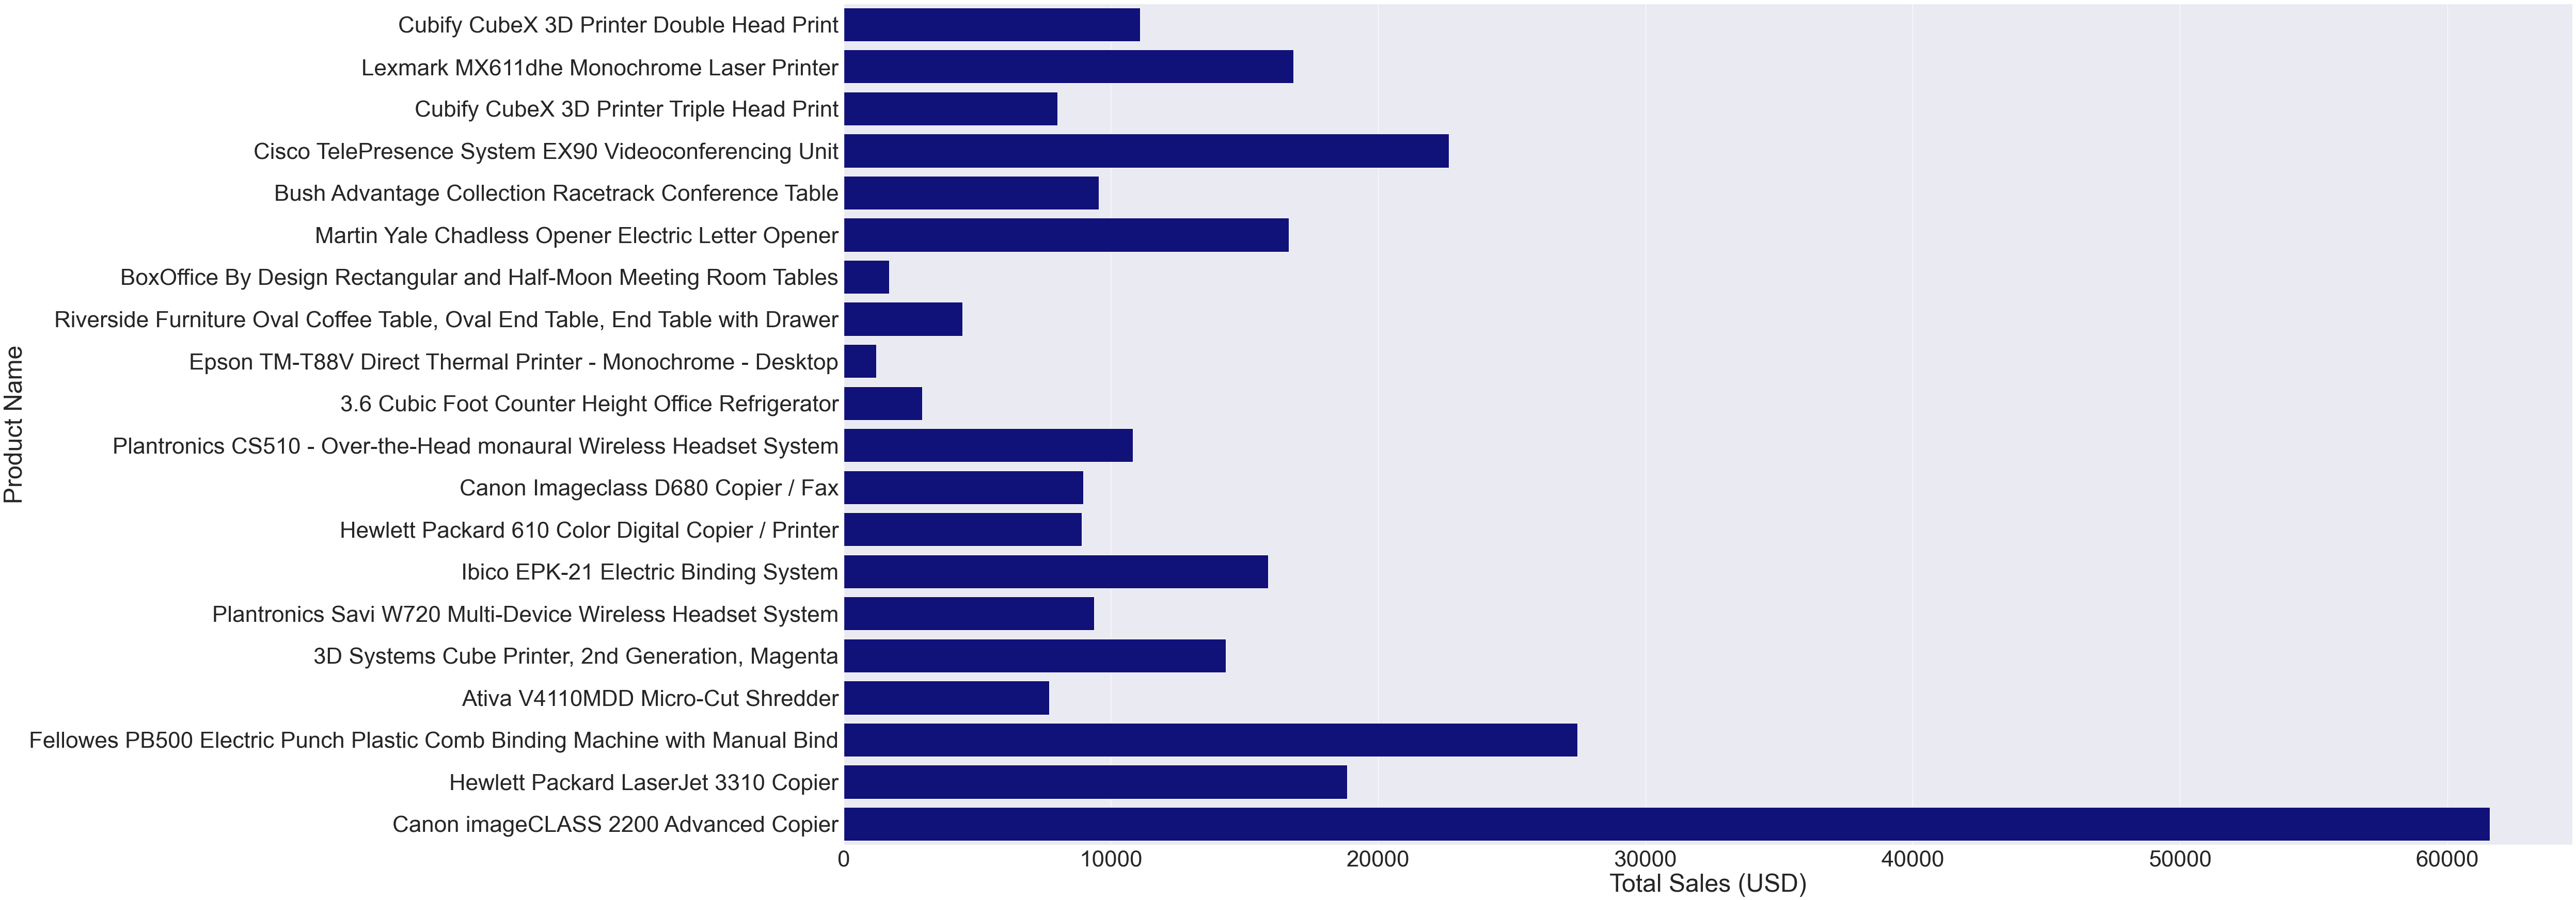

In [35]:
fig, ax = plt.subplots(figsize=(60,30))
sns.barplot(data = df_11, x='Sales', y = 'Product Name',color = 'darkblue')
sns.set(font_scale = 4)
sns.set_style("whitegrid")
ax.set_xlabel('Total Sales (USD)')

In [36]:
df_9 = df[df['Product Name'].isin(df_8['Product Name'])]
df_10 = df_9.groupby('Product Name')['Discount'].mean().reset_index()
df_11 = df_10.merge(df_8.loc[:,['Product Name', 'orderrr']], on = 'Product Name')
df_11 = df_11.sort_values('orderrr')
df_11

,Product Name,Discount,orderrr
8,Cubify CubeX 3D Printer Double Head Print,0.533333,1
15,Lexmark MX611dhe Monochrome Laser Printer,0.400000,2
9,Cubify CubeX 3D Printer Triple Head Print,0.500000,3
7,Cisco TelePresence System EX90 Videoconferenci...,0.500000,4
4,Bush Advantage Collection Racetrack Conference...,0.350000,5
16,Martin Yale Chadless Opener Electric Letter Op...,0.100000,6
3,BoxOffice By Design Rectangular and Half-Moon ...,0.483333,7
19,"Riverside Furniture Oval Coffee Table, Oval En...",0.300000,8
10,Epson TM-T88V Direct Thermal Printer - Monochr...,0.550000,9
0,3.6 Cubic Foot Counter Height Office Refrigerator,0.520000,10


Text(0.5, 0, 'Discount (%)')

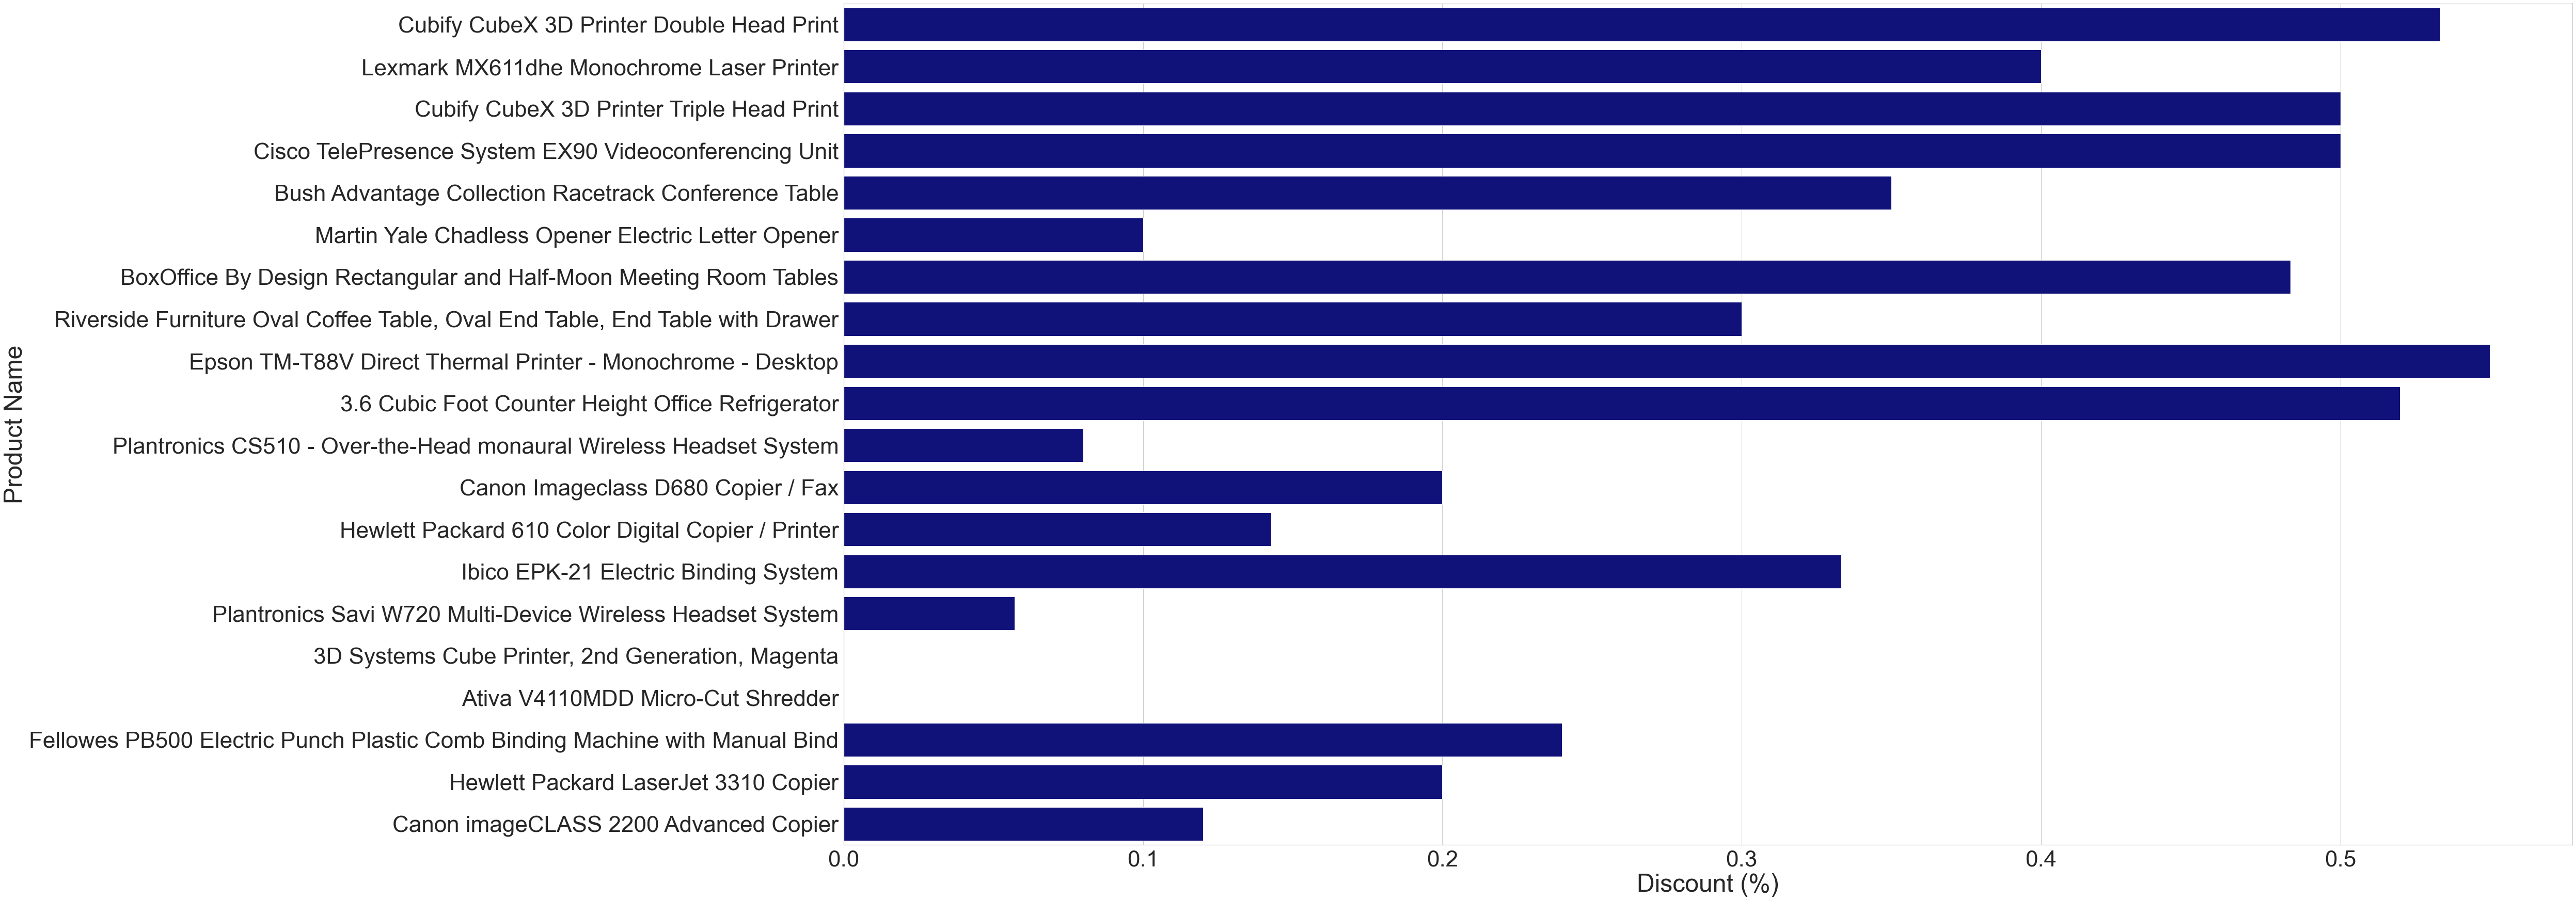

In [37]:
fig, ax = plt.subplots(figsize=(60,30))
sns.barplot(data = df_11, x='Discount', y = 'Product Name',color = 'darkblue')
sns.set(font_scale = 4)
sns.set_style("whitegrid")
ax.set_xlabel('Discount (%)')

Find sales, profit and discount in individual sub-categories

In [38]:
df_8 = df.groupby('Product Name')['Discount'].sum().sort_values().tail(20).reset_index()




C:\Users\Jorge\.conda\envs\Nuclio\lib\site-packages\mizani\palettes.py:397: UserWarning:

Warning message:Brewer palette Spectral has a maximum of 11 colors Returning the palette you asked for with that many colors

C:\Users\Jorge\.conda\envs\Nuclio\lib\site-packages\mizani\palettes.py:397: UserWarning:

Warning message:Brewer palette Spectral has a maximum of 11 colors Returning the palette you asked for with that many colors



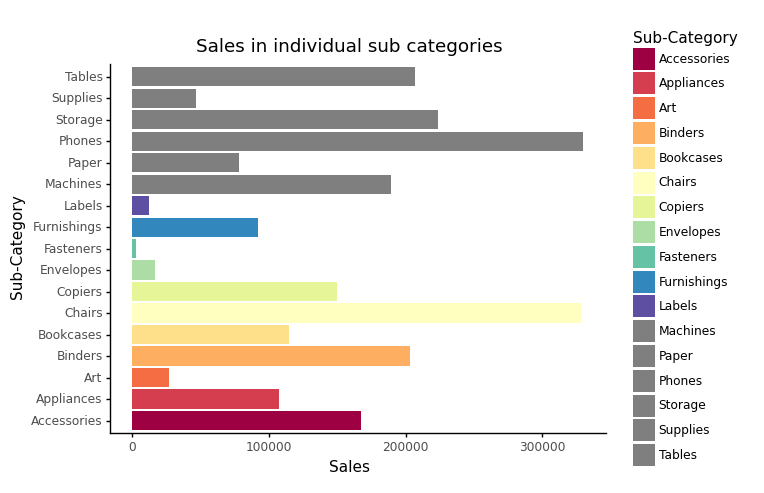

<ggplot: (116057126897)>

In [39]:
sales_plot = (ggplot(df, 
                        aes(x='Sub-Category', y ='Sales', fill = 'Sub-Category')) 
                        + geom_col() 
                        + coord_flip() 
                        + scale_fill_brewer(type = 'div', palette = 'Spectral') 
                        + theme_classic() 
                        + ggtitle('Sales in individual sub categories'))
display (sales_plot)

C:\Users\Jorge\.conda\envs\Nuclio\lib\site-packages\mizani\palettes.py:397: UserWarning:

Warning message:Brewer palette Spectral has a maximum of 11 colors Returning the palette you asked for with that many colors

C:\Users\Jorge\.conda\envs\Nuclio\lib\site-packages\mizani\palettes.py:397: UserWarning:

Warning message:Brewer palette Spectral has a maximum of 11 colors Returning the palette you asked for with that many colors



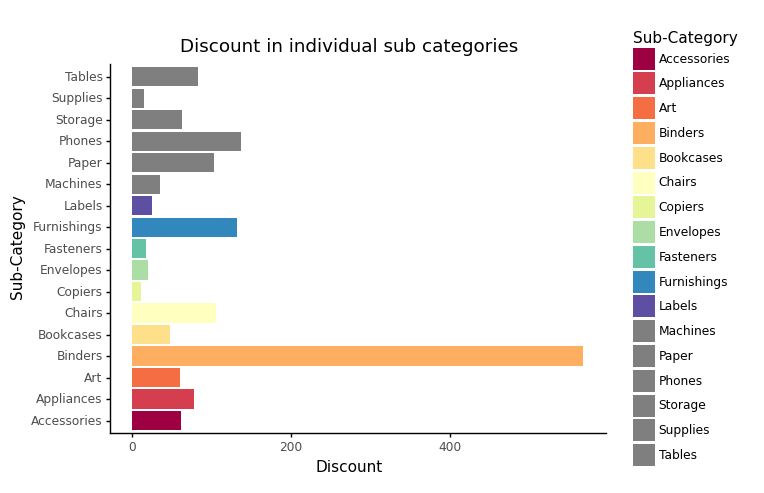

<ggplot: (116057178998)>

In [40]:
sales_plot = (ggplot(df, 
                        aes(x='Sub-Category', y ='Discount', fill = 'Sub-Category')) 
                        + geom_col() 
                        + coord_flip() 
                        + scale_fill_brewer(type = 'div', palette = 'Spectral') 
                        + theme_classic() 
                        + ggtitle('Discount in individual sub categories'))
display (sales_plot)

C:\Users\Jorge\.conda\envs\Nuclio\lib\site-packages\mizani\palettes.py:397: UserWarning:

Warning message:Brewer palette Spectral has a maximum of 11 colors Returning the palette you asked for with that many colors

C:\Users\Jorge\.conda\envs\Nuclio\lib\site-packages\mizani\palettes.py:397: UserWarning:

Warning message:Brewer palette Spectral has a maximum of 11 colors Returning the palette you asked for with that many colors



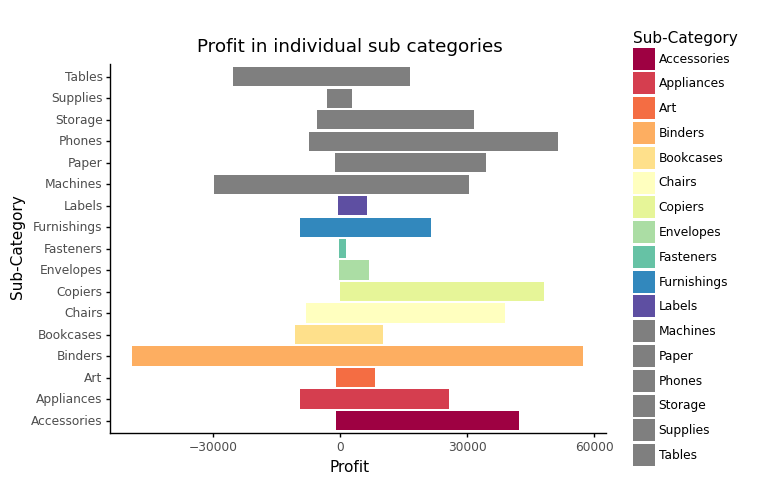

<ggplot: (116057191039)>

In [41]:
sales_plot = (ggplot(df, 
                        aes(x='Sub-Category', y ='Profit', fill = 'Sub-Category')) 
                        + geom_col() 
                        + coord_flip() 
                        + scale_fill_brewer(type = 'div', palette = 'Spectral') 
                        + theme_classic() 
                        + ggtitle('Profit in individual sub categories'))
display (sales_plot)

Which ship mode is widely used fromm individual category

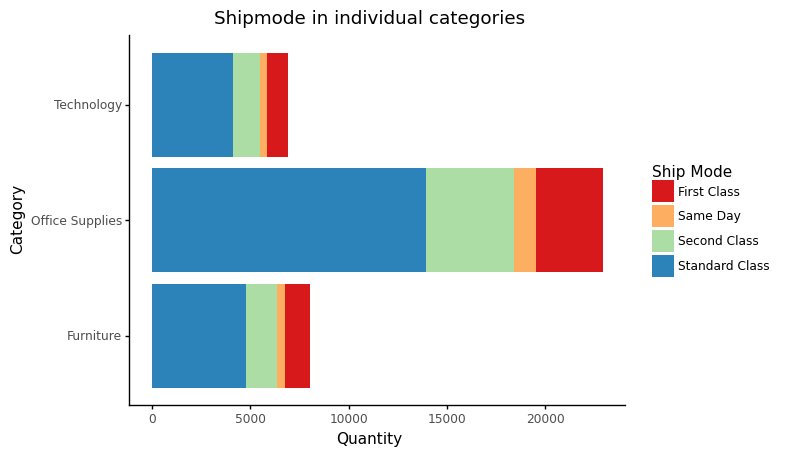

<ggplot: (116059419621)>

In [42]:
sales_plot= (ggplot(df, 
                        aes(x='Category', y ='Quantity', fill = 'Ship Mode')) 
                        + geom_col() 
                        + coord_flip() 
                        + scale_fill_brewer(type = 'div', palette = 'Spectral') 
                        + theme_classic() 
                        + ggtitle('Shipmode in individual categories'))
display (sales_plot)